In [54]:
import os                                             # Operational System para manipulação de arquivos.
import cv2                                            # OpenCV para manipulação de imagens.
import random
import numpy as np                                    # Numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt                       # Pyplot para plotagem de gráficos e imagens.
from sklearn.metrics import confusion_matrix          # Scikit-Learn para plotar a matriz de confusão
import seaborn as sn
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers                   # Módulo de camadas do Keras
from tensorflow.keras import callbacks                # Módulo de callbacks do Keras
from tensorflow.keras import optimizers               # Módulo de otimizadores do Keras
from tensorflow.keras.models import load_model        # Função para carregar um modelo salvo
from tensorflow.keras.models import Sequential        # Classe de modelos sequenciais para construir as redes neurais.
from tensorflow.keras.applications import VGG16       # Rede pre treinada (VGG16)

from google_drive_downloader import GoogleDriveDownloader as gdd

# ImageDataGenerator, utilizado para carregar imagens em tempo de execução
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount("/content/drive")

MessageError: ignored

In [5]:
!unzip "/content/DR_test_aumentada.zip"

Archive:  /content/DR_test_aumentada.zip
   creating: DR_test_aumentada/AKIECaugumentaded/
  inflating: DR_test_aumentada/AKIECaugumentaded/Aug_0_1018..jpg  
  inflating: DR_test_aumentada/AKIECaugumentaded/Aug_0_105..jpg  
  inflating: DR_test_aumentada/AKIECaugumentaded/Aug_0_1088..jpg  
  inflating: DR_test_aumentada/AKIECaugumentaded/Aug_0_1691..jpg  
  inflating: DR_test_aumentada/AKIECaugumentaded/Aug_0_1708..jpg  
  inflating: DR_test_aumentada/AKIECaugumentaded/Aug_0_1711..jpg  
  inflating: DR_test_aumentada/AKIECaugumentaded/Aug_0_1774..jpg  
  inflating: DR_test_aumentada/AKIECaugumentaded/Aug_0_1930..jpg  
  inflating: DR_test_aumentada/AKIECaugumentaded/Aug_0_1936..jpg  
  inflating: DR_test_aumentada/AKIECaugumentaded/Aug_0_1985..jpg  
  inflating: DR_test_aumentada/AKIECaugumentaded/Aug_0_2815..jpg  
  inflating: DR_test_aumentada/AKIECaugumentaded/Aug_0_3150..jpg  
  inflating: DR_test_aumentada/AKIECaugumentaded/Aug_0_3290..jpg  
  inflating: DR_test_aumentada/AKIECaug

In [ ]:
!unzip "/content/DR_train_aumentada.zip"

In [ ]:
!unzip "/content/DR_validation_aumentada.zip"

In [8]:
val_datagen   = ImageDataGenerator( rescale = 1./255 )
val_generator = val_datagen.flow_from_directory("/content/DR_validation_aumentada", target_size = (250, 250),
                                                 batch_size  = 64)

Found 530 images belonging to 7 classes.


In [9]:
# Atributo do generator que fornece o número de amostras detectadas
val_samples = val_generator.samples 
print(val_samples, "amostras detectadas")

# Atributo do generator que fornece o mapeamento de classe para índice 
# Repare que os índices são definidos pelo generator com base nos diretórios de arquivos em ordem alfabética
class_to_idx_dict = val_generator.class_indices
print( "Mapeamento Classes -> Índices:", class_to_idx_dict )

# Construção de um novo dicionário que inverte o mapeamento
idx_to_class_dict = { v: k for k, v in class_to_idx_dict.items() }
print( "Mapeamento Índices -> Classes:", idx_to_class_dict )

530 amostras detectadas
Mapeamento Classes -> Índices: {'AKIECaugumentaded': 0, 'BCCaugumentaded': 1, 'BKLaugumentaded': 2, 'DFaugumentaded': 3, 'MELaugumentaded': 4, 'NVaugumentaded': 5, 'VASCaugumentaded': 6}
Mapeamento Índices -> Classes: {0: 'AKIECaugumentaded', 1: 'BCCaugumentaded', 2: 'BKLaugumentaded', 3: 'DFaugumentaded', 4: 'MELaugumentaded', 5: 'NVaugumentaded', 6: 'VASCaugumentaded'}


In [10]:
train_datagen = ImageDataGenerator( rescale = 1./255 )
train_generator = train_datagen.flow_from_directory(
    "/content/DR_train_aumentada", target_size = (250, 250),
    batch_size  = 64)


# Atributo do generator que fornece o número de amostras detectadas
train_samples = train_generator.samples 
print(train_samples)

Found 13967 images belonging to 7 classes.
13967


In [11]:
test_datagen   = ImageDataGenerator( rescale = 1./255 )
test_generator = test_datagen.flow_from_directory("/content/DR_test_aumentada", target_size = (250, 250),
                                                   batch_size  = 64, shuffle = False)
batch_size = 64

Found 482 images belonging to 7 classes.


In [ ]:
def print_vgg16_summary( shape ):
    conv_base = VGG16(include_top = False, weights = "imagenet", input_shape = shape)
    print( conv_base.summary() )
    return

print_vgg16_summary( shape = (250, 250, 3) )

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0     

In [12]:
def print_mobilenetv2_summary( shape ):
    mobilebase = tf.keras.applications.MobileNetV2(input_shape=shape,alpha=1.0,include_top= False, weights="imagenet",
                                                    input_tensor=None,pooling=None,classes=1000,classifier_activation="softmax")
    print(mobilebase.summary())
    return

In [13]:
print_mobilenetv2_summary( shape = (250, 250, 3) )

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 125, 125, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 125, 125, 32  128         ['Conv1[0][0]']                  
                

In [59]:
def build_model( input_shape, n_outputs ):
    # Base convolucional
    #conv_base = VGG16(include_top = False, weights = "imagenet", input_shape = input_shape)
    #conv_base.trainable = False
    mobilebase = tf.keras.applications.MobileNetV2(input_shape=input_shape,alpha=1.0,include_top= False, weights="imagenet",
                                                    input_tensor=None,pooling=None,classes=1000,classifier_activation="softmax")
    mobilebase.trainable = False
    rede = Sequential()
    rede.add( mobilebase )
    rede.add( layers.Flatten() )
    rede.add( layers.Dropout( 0.50 ) )
    rede.add( layers.Dense( 256, activation = "relu" ) )
    rede.add( layers.Dropout( 0.30 ) )
    rede.add( layers.Dense(   7, activation = "softmax" ) )
    
    
    return rede

model = build_model( (250, 250, 3), 1 )
model.compile(optimizer=optimizers.Adam(lr=1e-5), 
              loss="categorical_crossentropy", 
              metrics=["acc"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 81920)             0         
                                                                 
 dropout_4 (Dropout)         (None, 81920)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               20971776  
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 7)                 1799      
                                                      

In [60]:
mobilebase = model.get_layer("mobilenetv2_1.00_224")
for layer in mobilebase.layers:
    status = "Treinável" if layer.trainable else "Congelada"
    print("Camada '{}' - Status: {} - Entrada: {} - Saída: {}".format(layer.name,
                                                                      status, 
                                                                      layer.input_shape, 
                                                                      layer.output_shape))

Camada 'input_6' - Status: Congelada - Entrada: [(None, 250, 250, 3)] - Saída: [(None, 250, 250, 3)]
Camada 'Conv1' - Status: Congelada - Entrada: (None, 250, 250, 3) - Saída: (None, 125, 125, 32)
Camada 'bn_Conv1' - Status: Congelada - Entrada: (None, 125, 125, 32) - Saída: (None, 125, 125, 32)
Camada 'Conv1_relu' - Status: Congelada - Entrada: (None, 125, 125, 32) - Saída: (None, 125, 125, 32)
Camada 'expanded_conv_depthwise' - Status: Congelada - Entrada: (None, 125, 125, 32) - Saída: (None, 125, 125, 32)
Camada 'expanded_conv_depthwise_BN' - Status: Congelada - Entrada: (None, 125, 125, 32) - Saída: (None, 125, 125, 32)
Camada 'expanded_conv_depthwise_relu' - Status: Congelada - Entrada: (None, 125, 125, 32) - Saída: (None, 125, 125, 32)
Camada 'expanded_conv_project' - Status: Congelada - Entrada: (None, 125, 125, 32) - Saída: (None, 125, 125, 16)
Camada 'expanded_conv_project_BN' - Status: Congelada - Entrada: (None, 125, 125, 16) - Saída: (None, 125, 125, 16)
Camada 'block_1_exp

In [61]:
model.trainable = True
mobilebase = model.get_layer("mobilenetv2_1.00_224")

set_trainable = False
for layer in mobilebase.layers:
    if layer.name == "Conv1":
        set_trainable = True
    layer.trainable = set_trainable

In [62]:
for layer in mobilebase.layers:
    status = "Treinável" if layer.trainable else "Congelada"
    print("Camada '{}' - Status: {} - Entrada: {} - Saída: {}".format( layer.name,
                                                                       status, 
                                                                       layer.input_shape, 
                                                                       layer.output_shape ))

Camada 'input_6' - Status: Congelada - Entrada: [(None, 250, 250, 3)] - Saída: [(None, 250, 250, 3)]
Camada 'Conv1' - Status: Treinável - Entrada: (None, 250, 250, 3) - Saída: (None, 125, 125, 32)
Camada 'bn_Conv1' - Status: Treinável - Entrada: (None, 125, 125, 32) - Saída: (None, 125, 125, 32)
Camada 'Conv1_relu' - Status: Treinável - Entrada: (None, 125, 125, 32) - Saída: (None, 125, 125, 32)
Camada 'expanded_conv_depthwise' - Status: Treinável - Entrada: (None, 125, 125, 32) - Saída: (None, 125, 125, 32)
Camada 'expanded_conv_depthwise_BN' - Status: Treinável - Entrada: (None, 125, 125, 32) - Saída: (None, 125, 125, 32)
Camada 'expanded_conv_depthwise_relu' - Status: Treinável - Entrada: (None, 125, 125, 32) - Saída: (None, 125, 125, 32)
Camada 'expanded_conv_project' - Status: Treinável - Entrada: (None, 125, 125, 32) - Saída: (None, 125, 125, 16)
Camada 'expanded_conv_project_BN' - Status: Treinável - Entrada: (None, 125, 125, 16) - Saída: (None, 125, 125, 16)
Camada 'block_1_exp

In [63]:
model.compile(optimizer=optimizers.Adam(learning_rate = 1e-5), 
              loss = "categorical_crossentropy", 
              metrics = ["acc"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_4 (Flatten)         (None, 81920)             0         
                                                                 
 dropout_4 (Dropout)         (None, 81920)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               20971776  
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 7)                 1799      
                                                      

In [50]:
ACCURACY_THRESHOLD = 0.95

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('val_accuracy') >= 0.95):
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
          model.save("model2.h5")
          self.model.stop_training = True

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')
]
callbacks = myCallback()
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy',metrics=METRICS)

In [65]:
model_checkpoint = callbacks.ModelCheckpoint("model_ft.h5", monitor = "acc", save_best_only = True, verbose = 1)
reduce_lr_on_plateau = callbacks.ReduceLROnPlateau(monitor = "acc", factor = 0.75, patience = 3, verbose = 1)

# Repare que ao utilizar mais de 1 callback elas devem ser organizadas em uma lista
callback_list = [model_checkpoint, reduce_lr_on_plateau]

In [66]:
history = model.fit( train_generator, steps_per_epoch = (train_samples/batch_size),
                     epochs = 30, callbacks =callback_list , 
                     validation_data = val_generator, validation_steps = (val_samples/batch_size))
history_dict = history.history
#history=model.fit(train_generator,validation_data=val_generator,epochs = 10,callbacks=[callbacks],verbose = 1)

Epoch 1/30
219/218 [==============================] - ETA: 0s - loss: 1.9518 - acc: 0.3898


Epoch 1: acc improved from -inf to 0.38978, saving model to model_ft.h5
218/218 [==============================] - 92s 402ms/step - loss: 1.9518 - acc: 0.3898 - val_loss: 2.1842 - val_acc: 0.3189 - lr: 1.0000e-05
Epoch 2/30
219/218 [==============================] - ETA: 0s - loss: 1.2022 - acc: 0.5483
Epoch 2: acc improved from 0.38978 to 0.54829, saving model to model_ft.h5
218/218 [==============================] - 85s 390ms/step - loss: 1.2022 - acc: 0.5483 - lr: 1.0000e-05
Epoch 3/30
219/218 [==============================] - ETA: 0s - loss: 1.0099 - acc: 0.6187
Epoch 3: acc improved from 0.54829 to 0.61867, saving model to model_ft.h5
218/218 [==============================] - 84s 383ms/step - loss: 1.0099 - acc: 0.6187 - lr: 1.0000e-05
Epoch 4/30
219/218 [==============================] - ETA: 0s - loss: 0.8643 - acc: 0.6780
Epoch 4: acc improved from 0.61867 to 0.67796, saving model to model_ft.h5
218/218 [==============================] - 84s 385ms/step - loss: 0.8643 - acc: 

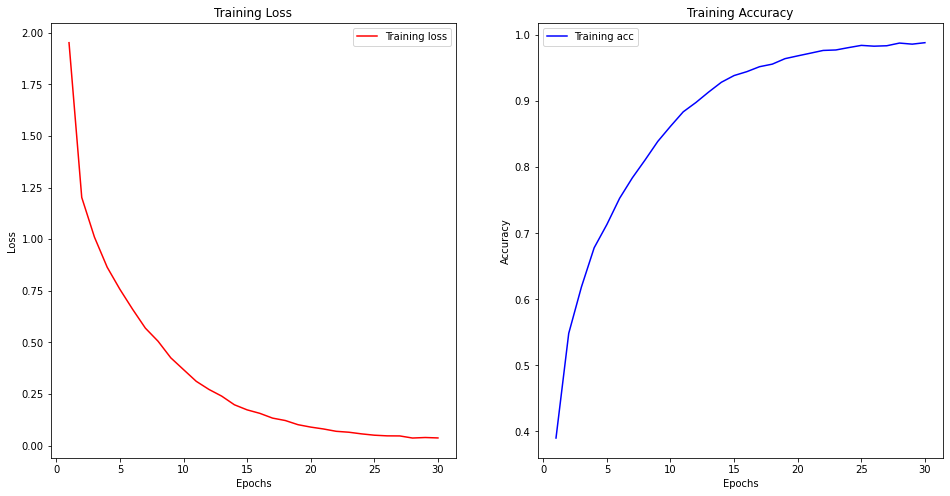

In [69]:
fig, axes = plt.subplots(1, 2, squeeze = False, figsize = (16,8))

# Loss
train_loss_values = history_dict['loss']

# Epochs
epochs = range(1, len(train_loss_values) + 1)

# Accuracy
train_acc_values = history_dict['acc']

ax = axes.flat[0]
ax.plot(epochs, train_loss_values, 'r', label='Training loss')
ax.set_title('Training Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

ax = axes.flat[1]
ax.plot(epochs, train_acc_values, 'b', label='Training acc')
ax.set_title('Training Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend()

In [100]:
test_samples = test_generator.samples

test_loss, test_acc = model.evaluate( test_generator )

print("Test Accuracy:", 100*test_acc, "%")
print("Acertos: {} - Erros: {}".format(round(test_samples * test_acc), 
                                       round(test_samples * (1-test_acc) )))

8/8 [==============================] - 1s 105ms/step - loss: 4.1961 - acc: 0.5353
Test Accuracy: 53.526973724365234 %
Acertos: 258 - Erros: 224
